In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Sweet & Vicious,2015.0
1,Someday I Suppose,2005.0
2,Gravity and Grace,2012.0
3,O Sabor do Pecado,1967.0
4,New in Town,2017.0


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
# What are the ten most common movie names of all time?

titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Freedom                 11
Temptation              11
Maya                    11
The Three Musketeers    11
Othello                 11
Kismet                  10
Name: title, dtype: int64

In [6]:
# Which three years of the 1930s saw the most films released?

t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937.0    1217
1938.0    1161
1936.0    1153
Name: year, dtype: int64

<Axes: >

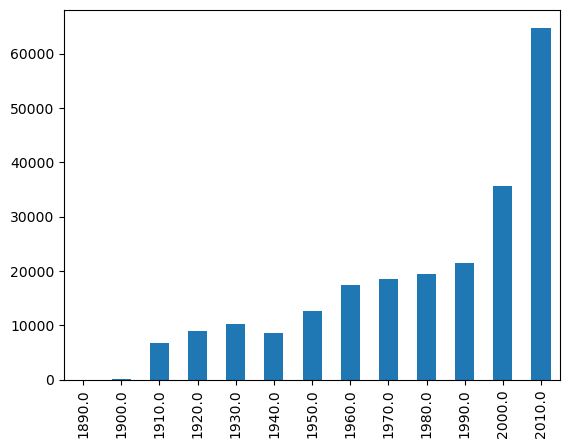

In [7]:
# Plot the number of films that have been released each decade
# over the history of cinema.

t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

<Axes: >

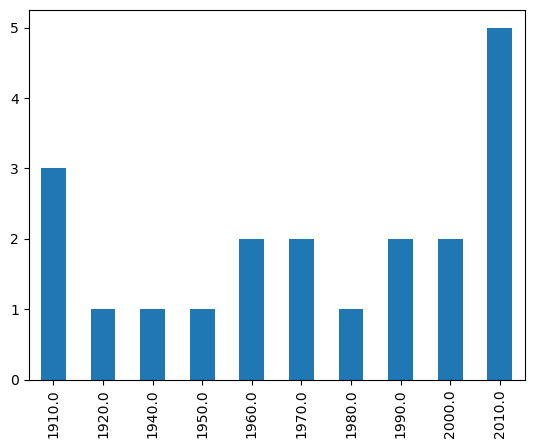

In [8]:
# Plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

<Axes: >

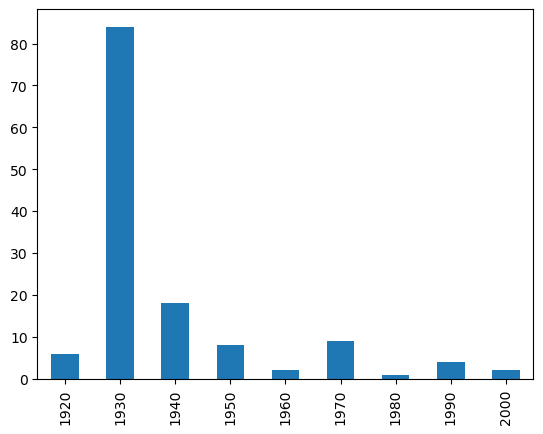

In [9]:
# Plot the number of "Rustler" characters
# in each decade of the history of film.

c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

<Axes: >

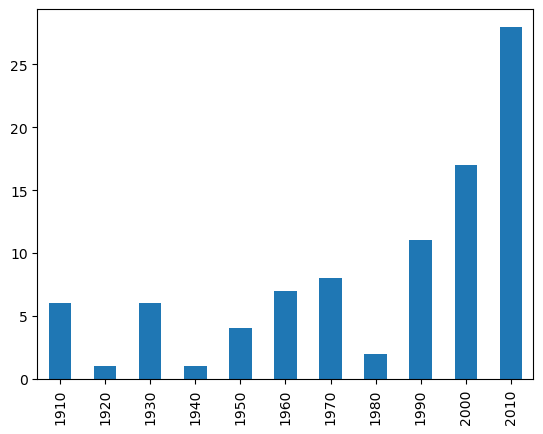

In [10]:
# Plot the number of "Hamlet" characters each decade.

c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

In [11]:
# What are the 11 most common character names in movie history?

cast.character.value_counts().head(11)

Himself        19418
Dancer         11937
Extra          10715
Reporter        7739
Doctor          6917
Party Guest     6744
Student         6486
Policeman       6409
Bartender       6228
Minor Role      6203
Herself         6112
Name: character, dtype: int64

In [12]:
# Who are the 10 people most often credited as "Herself" in film history?

c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II        11
Luisa Horga                9
María Luisa (V) Martín     9
Hillary Clinton            8
Joyce Brothers             8
Margaret Thatcher          8
Sumie Sakai                6
Marta Berrocal             6
Oprah Winfrey              6
Joan Rivers                6
Name: name, dtype: int64

In [13]:
# Who are the 10 people most often credited as "Himself" in film history?

c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler          91
Richard Nixon         43
Ronald Reagan         37
John F. Kennedy       35
George W. Bush        24
Winston Churchill     24
Martin Luther King    23
Bill Clinton          22
Benito Mussolini      21
Ron Jeremy            20
Name: name, dtype: int64

In [14]:
# Which actors or actresses appeared in the most movies in the year 1945?

cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan       37
Sam (II) Harris    31
Bess Flowers       28
Harold Miller      28
Franklyn Farnum    27
Nolan Leary        26
Larry Steers       25
Herman Hack        25
Tom London         24
Frank O'Connor     24
Name: name, dtype: int64

In [15]:
# Which actors or actresses appeared in the most movies in the year 1985?

cast[cast.year == 1985].name.value_counts().head(10)

Mammootty        22
Sukumari         20
Shakti Kapoor    19
Raj Babbar       15
Mohanlal         15
Lou Scheimer     15
Aruna Irani      13
Asrani           13
Om Shivpuri      13
Rajesh Khanna    13
Name: name, dtype: int64

<Axes: >

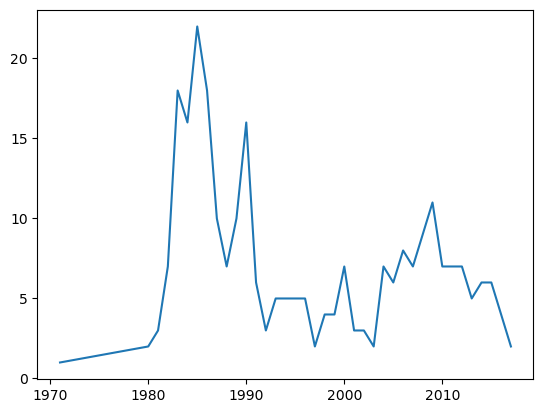

In [16]:
# Plot how many roles Mammootty has played in each year of his career.

cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

In [17]:
# What are the 10 most frequent roles that start with the phrase "Patron in"?

c = cast
c[c.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       8
Patron in Billiard Parlor        5
Patron in restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Patron in Bar                    3
Patron in Audience               2
Name: character, dtype: int64

In [18]:
# What are the 10 most frequent roles that start with the word "Science"?

c = cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         57
Science Fair Student     9
Science Student          6
Science Kid              5
Science Fair Kid         5
Science Fair Judge       5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: character, dtype: int64

<Axes: xlabel='year', ylabel='n'>

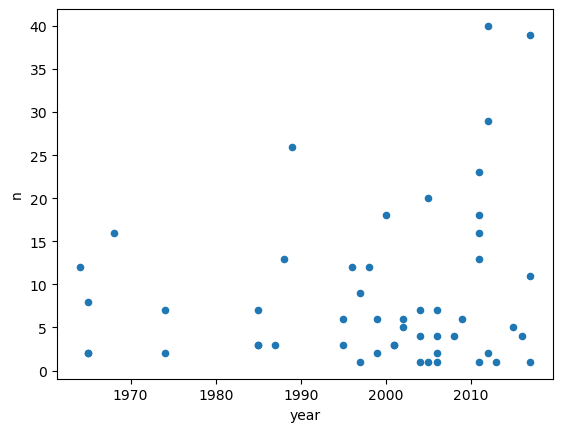

In [19]:
# Plot the n-values of the roles that Judi Dench has played over her career.

c = cast
c = c[c.name == 'Judi Dench']
c.plot(x='year', y='n', kind='scatter')

<Axes: xlabel='year', ylabel='n'>

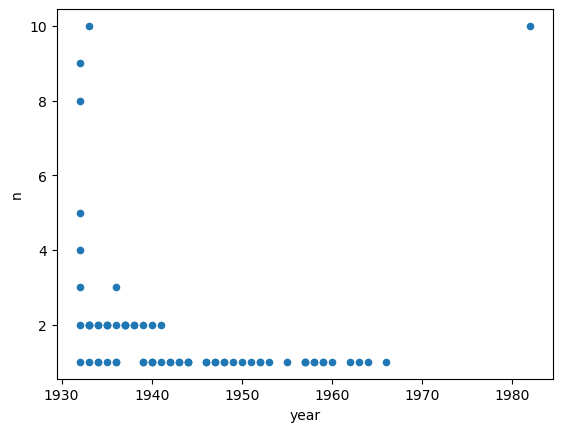

In [20]:
# Plot the n-values of Cary Grant's roles through his career.

c = cast
c = c[c.name == 'Cary Grant'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

<Axes: xlabel='year', ylabel='n'>

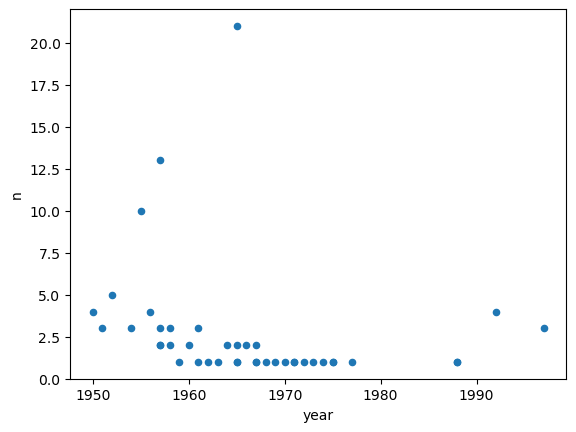

In [21]:
# Plot the n-value of the roles that Sidney Poitier has acted
# over the years.

c = cast
c = c[c.name == 'Sidney Poitier'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

In [22]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6482
actress    2985
Name: type, dtype: int64

In [23]:
# How many supporting (n=2) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actor      4520
actress    4496
Name: type, dtype: int64